In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, mean_absolute_error, f1_score
import warnings

sns.set()
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Cleaning data.csv")
df.head()

,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,ISR,NLD,RUS,SGP,SWE,USA,other.1,isClosed,Age_in_Days,Age_in_Days.1
0,operating,2005.0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,...,False,False,False,False,False,True,False,1.0,6935.0,6935.0
1,acquired,2007.0,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,...,False,False,False,False,False,True,False,0.0,0.0,0.0
2,operating,2007.0,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,False,True,False,1.0,6205.0,6205.0
3,operating,2003.0,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,...,False,False,False,False,False,True,False,1.0,7665.0,7665.0
4,operating,2006.0,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,...,False,False,False,False,False,True,False,1.0,6570.0,6570.0


In [3]:
#Dropping a column as there are two same column 

df.drop('Age_in_Days.1', axis=1, inplace=True)
df

,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,IRL,ISR,NLD,RUS,SGP,SWE,USA,other.1,isClosed,Age_in_Days
0,operating,2005.0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,...,False,False,False,False,False,False,True,False,1.0,6935.0
1,acquired,2007.0,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,...,False,False,False,False,False,False,True,False,0.0,0.0
2,operating,2007.0,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,False,False,True,False,1.0,6205.0
3,operating,2003.0,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,...,False,False,False,False,False,False,True,False,1.0,7665.0
4,operating,2006.0,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,...,False,False,False,False,False,False,True,False,1.0,6570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20462,closed,2008.0,9.010471,2008.0,2008.0,1.0,130000.0,2008.000000,2009.000000,2.000000,...,False,False,False,False,False,False,True,False,0.0,0.0
20463,operating,2011.0,9.010471,2011.0,2011.0,1.0,500000.0,2011.000000,2011.000000,1.000000,...,False,False,False,False,False,False,False,False,1.0,4745.0
20464,closed,2006.0,9.010471,2008.0,2009.0,2.0,1100000.0,2005.000000,2008.000000,2.000000,...,False,False,False,False,False,False,True,False,0.0,0.0
20465,operating,2007.0,9.010471,2008.0,2008.0,1.0,750000.0,2013.000000,2013.000000,1.000000,...,False,False,False,False,False,False,True,False,1.0,6205.0


In [4]:
#Renaming some columns

df.rename(columns={'other.1': 'other_countries', 'other': 'other_categories'}, inplace=True)
df

,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,IRL,ISR,NLD,RUS,SGP,SWE,USA,other_countries,isClosed,Age_in_Days
0,operating,2005.0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,...,False,False,False,False,False,False,True,False,1.0,6935.0
1,acquired,2007.0,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,...,False,False,False,False,False,False,True,False,0.0,0.0
2,operating,2007.0,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,...,False,False,False,False,False,False,True,False,1.0,6205.0
3,operating,2003.0,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,...,False,False,False,False,False,False,True,False,1.0,7665.0
4,operating,2006.0,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,...,False,False,False,False,False,False,True,False,1.0,6570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20462,closed,2008.0,9.010471,2008.0,2008.0,1.0,130000.0,2008.000000,2009.000000,2.000000,...,False,False,False,False,False,False,True,False,0.0,0.0
20463,operating,2011.0,9.010471,2011.0,2011.0,1.0,500000.0,2011.000000,2011.000000,1.000000,...,False,False,False,False,False,False,False,False,1.0,4745.0
20464,closed,2006.0,9.010471,2008.0,2009.0,2.0,1100000.0,2005.000000,2008.000000,2.000000,...,False,False,False,False,False,False,True,False,0.0,0.0
20465,operating,2007.0,9.010471,2008.0,2008.0,1.0,750000.0,2013.000000,2013.000000,1.000000,...,False,False,False,False,False,False,True,False,1.0,6205.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20467 entries, 0 to 20466
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              20467 non-null  object 
 1   founded_at          20467 non-null  float64
 2   investment_rounds   20467 non-null  float64
 3   first_funding_at    20467 non-null  float64
 4   last_funding_at     20467 non-null  float64
 5   funding_rounds      20467 non-null  float64
 6   funding_total_usd   20467 non-null  float64
 7   first_milestone_at  20467 non-null  float64
 8   last_milestone_at   20467 non-null  float64
 9   milestones          20467 non-null  float64
 10  relationships       20467 non-null  float64
 11  lat                 20467 non-null  float64
 12  lng                 20467 non-null  float64
 13  analytics           20467 non-null  bool   
 14  biotech             20467 non-null  bool   
 15  cleantech           20467 non-null  bool   
 16  ecom

In [6]:
df.describe()


,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,Age_in_Days
count,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,2.046700e+04,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,2006.368544,9.010471,2009.900323,2010.984767,1.885181,1.582132e+07,2010.164879,2011.046642,1.703825,6.140570,38.559376,-67.025344,0.857624,5436.960962
std,6.949051,4.038537,2.713800,2.315257,1.356443,6.990693e+07,2.368905,2.182905,0.722371,13.396884,12.595273,61.674273,0.349443,3270.875167
min,1906.000000,1.000000,1960.000000,1984.000000,1.000000,2.910000e+02,1976.000000,1976.000000,1.000000,1.000000,-42.883611,-158.056896,0.000000,0.000000
25%,2004.000000,9.010471,2008.000000,2010.000000,1.000000,5.110380e+05,2010.000000,2011.000000,1.000000,2.000000,36.169941,-118.491191,1.000000,4380.000000
50%,2008.000000,9.010471,2011.000000,2012.000000,1.000000,2.725875e+06,2010.164879,2011.046642,1.703825,4.000000,38.958631,-80.483192,1.000000,5475.000000
75%,2011.000000,9.010471,2012.000000,2013.000000,2.000000,1.200000e+07,2011.000000,2012.000000,2.000000,6.140570,42.891178,-46.633309,1.000000,6570.000000
max,2014.000000,478.000000,2013.000000,2013.000000,15.000000,5.700000e+09,2014.000000,2014.000000,9.000000,1046.000000,70.919200,174.811945,1.000000,43070.000000


2. Feature Selection

In [7]:
columns_target = df.select_dtypes(['float64','object'])
columns_target.columns

Index(['status', 'founded_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng', 'isClosed', 'Age_in_Days'],
      dtype='object')

In [8]:
df_1 = df.copy()
df_1 = df[columns_target.columns]
df_1.columns

Index(['status', 'founded_at', 'investment_rounds', 'first_funding_at',
       'last_funding_at', 'funding_rounds', 'funding_total_usd',
       'first_milestone_at', 'last_milestone_at', 'milestones',
       'relationships', 'lat', 'lng', 'isClosed', 'Age_in_Days'],
      dtype='object')

In [9]:
train_features = columns_target.columns.tolist()
del train_features[0]
train_features

['founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'isClosed',
 'Age_in_Days']

In [10]:
#Eliminating 'isClosed' as it relates to 'status'
del train_features[12]
train_features

['founded_at',
 'investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days']

In [11]:
#Eliminating 'founded_at' as it relates to 'Age_in_Days'
del train_features[0]
train_features

['investment_rounds',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'Age_in_Days']

In [12]:
# Encoding status 
df_1['status'] , _ = df_1['status'].factorize()
df_1['status'].value_counts()


status
0    17250
1     1747
2     1167
3      303
Name: count, dtype: int64

In [13]:
# using k-means 
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=6)
df_1['cluster'] = kmean.fit_predict(df_1[['lat','lng']])
df_1['cluster'] = df_1['cluster'].astype("category")
df_1['cluster'].value_counts()

cluster
0    8046
3    7171
2    3644
1     770
4     640
5     196
Name: count, dtype: int64

In [14]:
df_2 = df_1.drop(['lat','lng'],axis=1)
df_2 

,status,founded_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,isClosed,Age_in_Days,cluster
0,0,2005.0,9.010471,2005.0,2008.0,3.0,39750000.0,2010.000000,2013.000000,5.000000,17.0,1.0,6935.0,3
1,1,2007.0,9.010471,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,14.0,0.0,0.0,3
2,0,2007.0,9.010471,2008.0,2013.0,5.0,68069200.0,2010.164879,2011.046642,1.703825,14.0,1.0,6205.0,3
3,0,2003.0,9.010471,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,6.0,1.0,7665.0,0
4,0,2006.0,9.010471,2008.0,2013.0,3.0,33000000.0,2010.000000,2013.000000,3.000000,19.0,1.0,6570.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20462,2,2008.0,9.010471,2008.0,2008.0,1.0,130000.0,2008.000000,2009.000000,2.000000,3.0,0.0,0.0,3
20463,0,2011.0,9.010471,2011.0,2011.0,1.0,500000.0,2011.000000,2011.000000,1.000000,2.0,1.0,4745.0,0
20464,2,2006.0,9.010471,2008.0,2009.0,2.0,1100000.0,2005.000000,2008.000000,2.000000,4.0,0.0,0.0,3
20465,0,2007.0,9.010471,2008.0,2008.0,1.0,750000.0,2013.000000,2013.000000,1.000000,14.0,1.0,6205.0,3


In [15]:
X = df_2.drop('status', axis=1)
y = df_2['status']

In [16]:
# Assuming you have your data loaded into X (features) and y (labels/target)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [18]:
model = MultinomialNB().fit(X_train, y_train)

In [19]:
predictions = model.predict(X_test)

In [20]:
# Calculating the scores on test set

test_accuracy = accuracy_score(y_test, model.predict(X_test))
train_accuracy = accuracy_score(y_train, model.predict(X_train))
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)


In [21]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function plots the confusion matrix.
    
    Parameters:
        cm (array-like): Confusion matrix.
        classes (list): List of class labels.
        normalize (bool): Whether to normalize the confusion matrix or not.
        title (str): Title of the plot.
        cmap (matplotlib.colors.Colormap): Colormap used for visualization.
    """
    # Plotting the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(range(cm.shape[0]))
    plt.yticks(range(cm.shape[1]))

    # Normalizing the confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
    else:
        cm = cm

    # Setting threshold for text color
    thresh = cm.max() / 2.
    
    # Adding text annotations to the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Formatting the plot
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [22]:
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Test Accuracy: 0.8522227650219834
Train Accuracy: 0.8405301410859342
Precision: 0.9381964099482881
Recall: 0.8522227650219834
F1-score: 0.881020616196525
Mean Absolute Error: 0.32730825598436736
Mean Squared Error: 0.8622374206155349



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      3474
           1       0.82      0.36      0.50       337
           2       0.50      0.87      0.64       230
           3       0.07      0.53      0.13        53

    accuracy                           0.85      4094
   macro avg       0.60      0.67      0.55      4094
weighted avg       0.94      0.85      0.88      4094

Confusion Matrix:


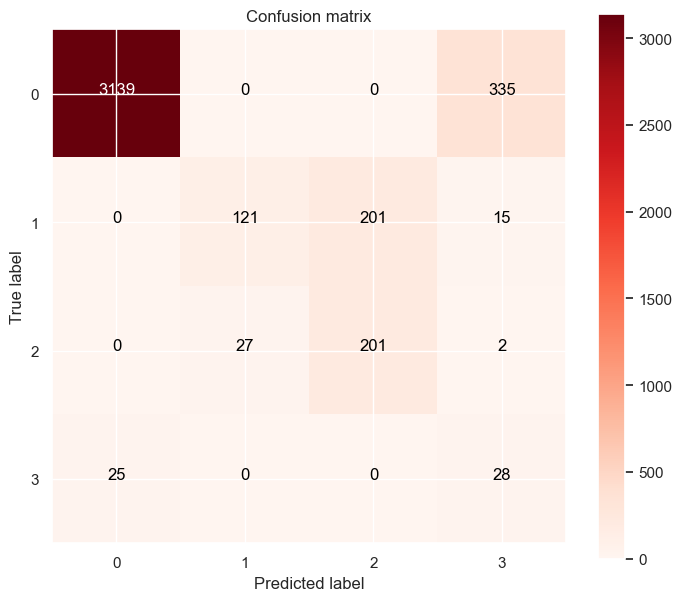

In [23]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
conf_mat = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)
fig1 = plt.figure(figsize=(7, 6))
plot_confusion_matrix(conf_mat, classes=np.unique(y_train), title='Confusion matrix')

In [24]:
# Creating a DataFrame to store the evaluation metrics
model_result = pd.DataFrame({
    'test accuracy': test_accuracy,
    'train accuarcy': train_accuracy,
    'precision score': precision,
    'recall score': recall,
    'mse': mse,
    'mae': mae,
    'F_1 score': f1
}, index=['NB_normal'])

model_result

,test accuracy,train accuarcy,precision score,recall score,mse,mae,F_1 score
NB_normal,0.852223,0.84053,0.938196,0.852223,0.862237,0.327308,0.881021
